In [1]:
import easyocr
import cv2
from PIL import Image

import os

In [2]:
#Remove dodgy images
data_dir = 't'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image)
    try:
        img = cv2.imread(image_path)
        _, ext = os.path.splitext(image_path)
        ext = ext.lower().replace('.', '')
        if ext not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
        #else :
            #print("it's ok")
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        # os.remove(image_path)

In [3]:
import pandas as pd
import numpy as np 

from glob import glob 
from tqdm.notebook import tqdm 

import matplotlib.pyplot as plt 

In [4]:
img_fns = glob(data_dir + '/*')
#print(img_fns)

In [5]:
img_id = img_fns[0].split('\\')[-1].split('.')[0]

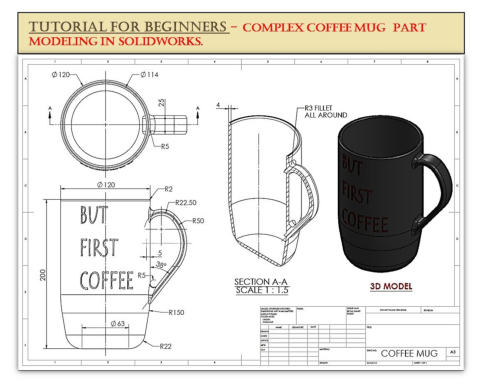

In [6]:
img = plt.imread(img_fns[0]); plt.imshow(img); plt.axis('off'); plt.show()
#plt.imshow(plt.imread(img_fns[0]))

In [9]:
from progressbar import ProgressBar

reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage

dfs = []
pbar = ProgressBar()
for img in pbar(img_fns[:25]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

Using CPU. Note: This module is much faster with a GPU.
100% |########################################################################|


In [10]:
import keras_ocr

In [11]:
def plot(img_fn, easyocr_df):
    #img_id = img_fn.split('/')[-1].split('.')[0]
    #fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    

    #easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    #easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    #keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    #easy_results, ax=axs[0])
    #axs[0].set_title('easyocr results', fontsize=24)
    ##keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    ##keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    ##keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    #keras_results, ax=axs[1])
    ##axs[1].set_title('keras_ocr results', fontsize=24)
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, ax = plt.subplots(figsize=(15, 10))  # Create one sub trame

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    easy_results, ax=ax) #color=(0, 255, 0) #line_thickness=1 # Affiche l'image et les résultats de reconnaissance de texte dans la sous-trame
    ax.set_title(img_id + 'result', fontsize=24)
    
    plt.show()

In [12]:
'''
def plot(img_fn, easyocr_df, threshold=0.25):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, ax = plt.subplots(figsize=(15, 10))  # Create one sub trame

    # Filter results by confidence score
    easy_results = easyocr_df.query('img_id == @img_id and conf > @threshold')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]

    # Draw annotations on image
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    easy_results, ax=ax)  # Affiche l'image et les résultats de reconnaissance de texte dans la sous-trame
    ax.set_title(img_id + ' result', fontsize=24)

    plt.show()
    '''

"\ndef plot(img_fn, easyocr_df, threshold=0.25):\n    img_id = img_fn.split('/')[-1].split('.')[0]\n    fig, ax = plt.subplots(figsize=(15, 10))  # Create one sub trame\n\n    # Filter results by confidence score\n    easy_results = easyocr_df.query('img_id == @img_id and conf > @threshold')[['text','bbox']].values.tolist()\n    easy_results = [(x[0], np.array(x[1])) for x in easy_results]\n\n    # Draw annotations on image\n    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),\n                                    easy_results, ax=ax)  # Affiche l'image et les résultats de reconnaissance de texte dans la sous-trame\n    ax.set_title(img_id + ' result', fontsize=24)\n\n    plt.show()\n    "

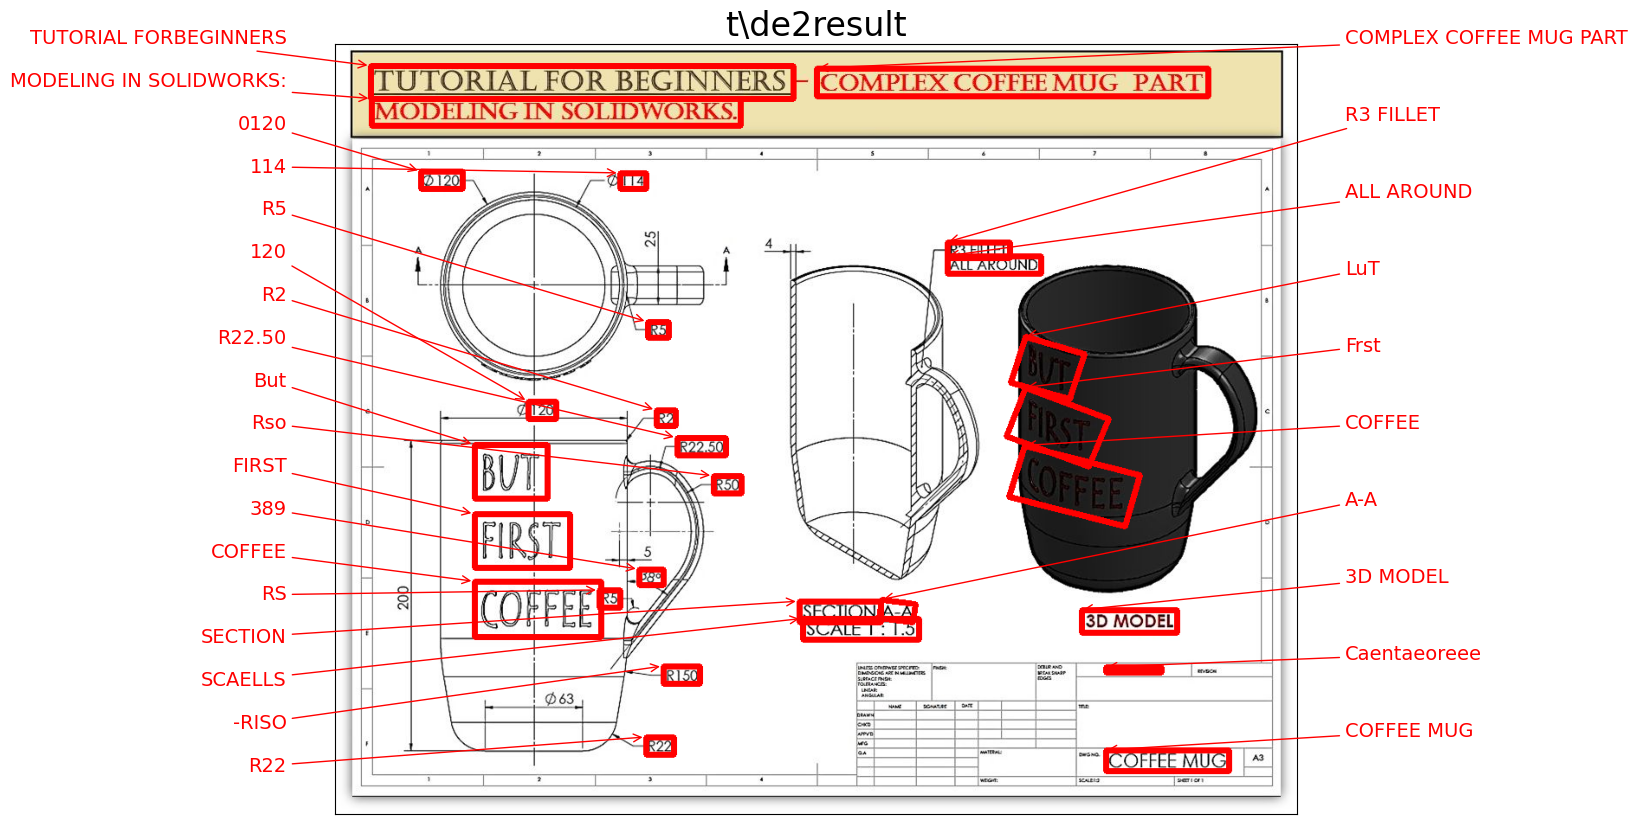

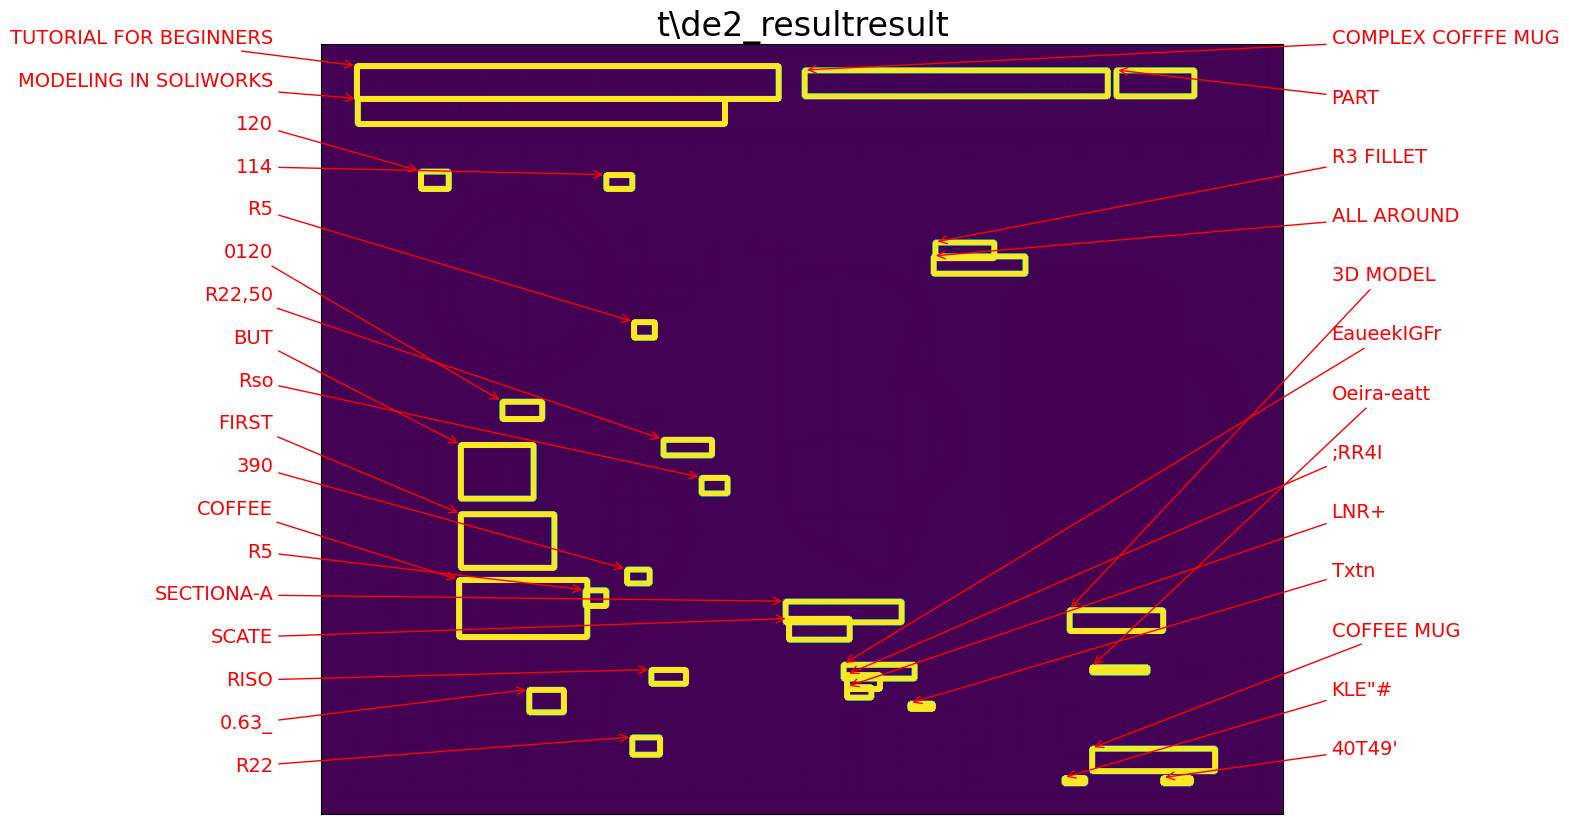

'\nfor img_fn in img_fns[:25]:\n    plot(img_fn, easyocr_df, threshold=0.25)  \n'

In [13]:
# Loop over results  
for img_fn in img_fns[:25]:
    plot(img_fn, easyocr_df)  
'''
for img_fn in img_fns[:25]:
    plot(img_fn, easyocr_df, threshold=0.25)  
'''

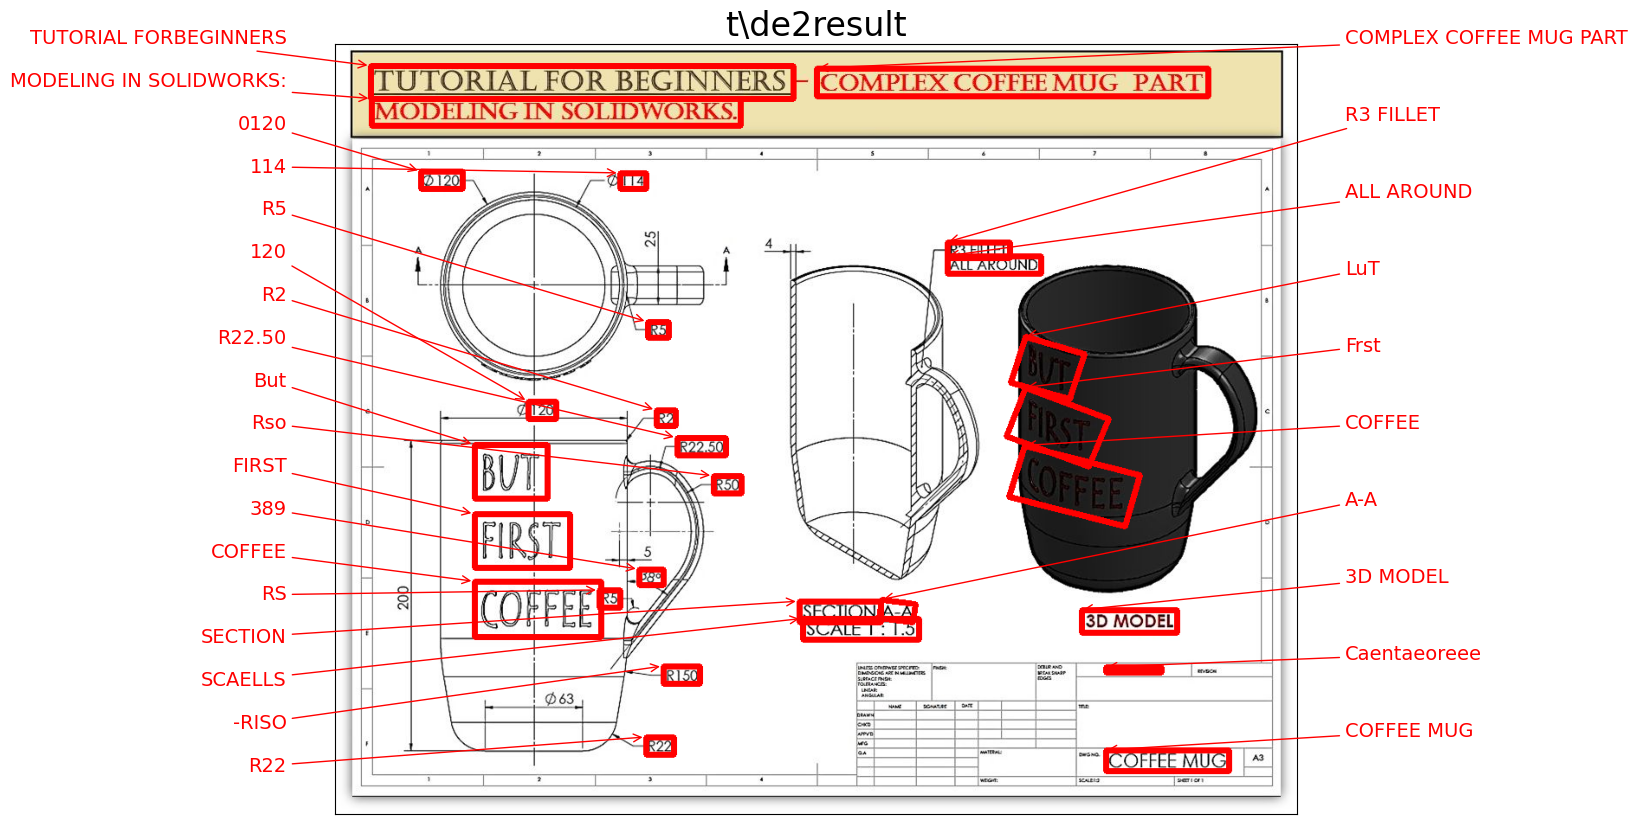

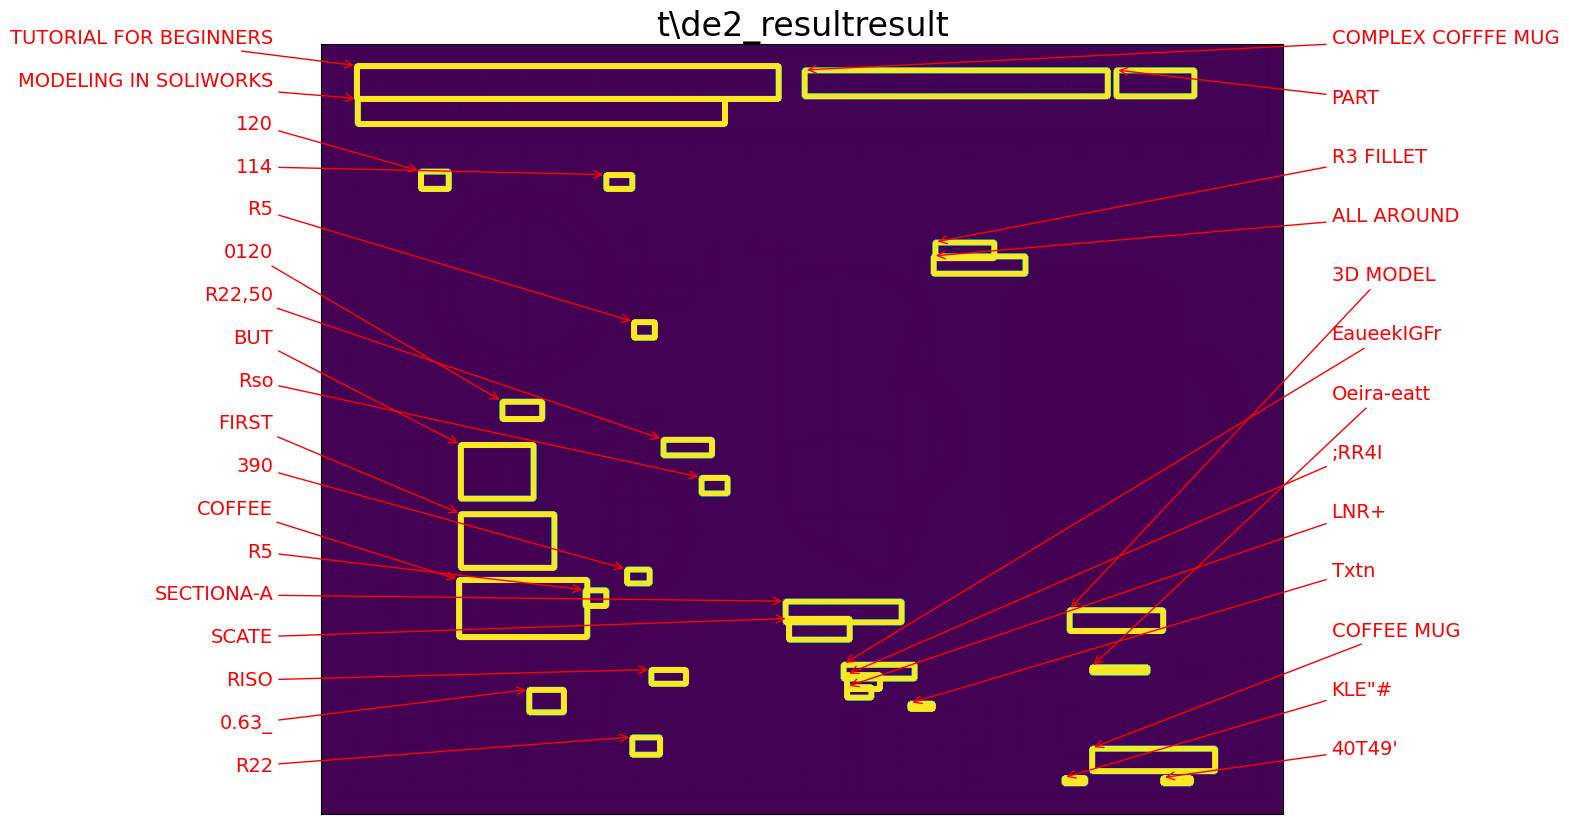

"\n# Loop over results\nthreshold = 0.25\n\nfor img_fn in img_fns[:25]:\n    # get trust value for actual image \n    img_id = img_fn.split('/')[-1].split('.')[0]\n    conf = easyocr_df.query('img_id == @img_id')['conf'].iloc[0]\n\n    # verify if trust value is superior than threshold\n    if conf > threshold:\n        plot(img_fn, easyocr_df)\n"

In [14]:
# Loop over results
for img_fn in img_fns[:25]:
    plot(img_fn, easyocr_df)
'''
# Loop over results
threshold = 0.25

for img_fn in img_fns[:25]:
    # get trust value for actual image 
    img_id = img_fn.split('/')[-1].split('.')[0]
    conf = easyocr_df.query('img_id == @img_id')['conf'].iloc[0]

    # verify if trust value is superior than threshold
    if conf > threshold:
        plot(img_fn, easyocr_df)
'''
